# Experiment 1

Preliminary experiment using 0.8 and 2.0 velocities.

In [41]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sompy
import csv
import skfuzzy as fuzz
from sklearn.cluster import KMeans

In [42]:
#Get data from all pacients onçy 0.8m/s and 2.0m/s

# pacients = ["01/01", "02/02", "03/03", "04/04", "05/05", "06/06", "07/07", "08/08"]
pacients = ["02/02"]

velocities = ["08", "20"]

repetitions = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10"]

frames = []

for pacient in pacients:
    for velocity in velocities:
        for index in repetitions:
            data_location = './../data/'+pacient+'_Gang_'+ velocity + '_' + index + '.csv'
            read_data = pd.read_csv(data_location, engine='python', sep=None)
            new_data = pd.DataFrame(read_data)
            frames.append(new_data)
            
result = pd.concat(frames)
result

,"Time,s","Lumbar Flexion,deg","Lumbar Lateral - RT,deg","Lumbar Axial - RT,deg","Thoracic Flexion,deg","Thoracic Lateral - RT,deg","Thoracic Axial - RT,deg","LT Ellbogen Flexion,deg","RT Ellbogen Flexion,deg","LT Shoulder Total Flexion,deg",...,"LT Foot Rot Z,","RT Thigh Rot X,","RT Thigh Rot Y,","RT Thigh Rot Z,","RT Shank Rot X,","RT Shank Rot Y,","RT Shank Rot Z,","RT Foot Rot X,","RT Foot Rot Y,","RT Foot Rot Z,"
0,0.00,-1.393490,0.213378,-2.16036,1.086600,1.112100,0.808698,-1.19526,-0.891577,2.65669,...,0.039370,-0.525669,-0.589394,-0.446502,-0.504679,-0.580307,-0.426792,-0.260818,-0.236342,-0.314532
1,0.01,-1.398710,0.196020,-2.18028,1.094250,1.110620,0.838629,-1.22848,-0.903999,2.68709,...,0.039370,-0.525654,-0.589377,-0.446611,-0.504985,-0.580064,-0.427098,-0.261178,-0.236275,-0.314342
2,0.02,-1.410280,0.182254,-2.19242,1.100900,1.115500,0.846535,-1.26098,-0.923233,2.71196,...,0.039309,-0.525672,-0.589337,-0.446687,-0.505278,-0.579806,-0.427454,-0.261549,-0.236279,-0.314164
3,0.03,-1.428750,0.157415,-2.20382,1.109350,1.122500,0.851617,-1.27494,-0.932850,2.71915,...,0.039308,-0.525734,-0.589276,-0.446810,-0.505711,-0.579446,-0.427764,-0.261970,-0.236213,-0.313913
4,0.04,-1.445540,0.148736,-2.22067,1.107540,1.118470,0.869689,-1.29757,-0.926438,2.72192,...,0.039247,-0.525800,-0.589159,-0.446997,-0.506142,-0.579145,-0.428133,-0.262584,-0.236033,-0.313673
5,0.05,-1.454680,0.124795,-2.23479,1.100290,1.121430,0.870818,-1.32236,-0.937258,2.73905,...,0.039186,-0.525976,-0.588907,-0.447357,-0.506633,-0.578844,-0.428563,-0.263140,-0.235795,-0.313498
6,0.06,-1.473900,0.098160,-2.26522,1.101700,1.119100,0.886066,-1.35896,-0.938860,2.75342,...,0.039065,-0.526218,-0.588539,-0.447844,-0.507248,-0.578482,-0.428994,-0.263753,-0.235552,-0.313317
7,0.07,-1.492930,0.055963,-2.30379,1.104320,1.125470,0.910914,-1.40181,-0.938460,2.77885,...,0.039004,-0.526629,-0.588033,-0.448380,-0.507913,-0.578231,-0.429293,-0.264240,-0.235490,-0.313133
8,0.08,-1.503190,0.018854,-2.33204,1.100690,1.116770,0.940281,-1.42925,-0.939662,2.79378,...,0.038820,-0.527067,-0.587373,-0.449121,-0.508322,-0.578210,-0.429461,-0.264971,-0.235245,-0.312887
9,0.09,-1.511020,-0.042197,-2.35758,1.079950,1.123340,0.946493,-1.49160,-0.934052,2.82307,...,0.038697,-0.527676,-0.586516,-0.450096,-0.508690,-0.578335,-0.429524,-0.265815,-0.234930,-0.312508


In [43]:
# Get only columns
columns_names = ['Upper spine Accel Earth X,mG', 'Upper spine Accel Earth Y,mG', 'Upper spine Accel Earth Z,mG','Lower spine Accel Earth X,mG', 'Lower spine Accel Earth Y,mG', 'Lower spine Accel Earth Z,mG',
                 'LT Hand Accel Earth X,mG', 'LT Hand Accel Earth Y,mG', 'LT Hand Accel Earth Z,mG', 
                 'RT Hand Accel Earth X,mG', 'RT Hand Accel Earth Y,mG', 'RT Hand Accel Earth Z,mG', 
                 'LT Shank Accel Earth X,mG', 'LT Shank Accel Earth Y,mG', 'LT Shank Accel Earth Z,mG',
                 'RT Shank Accel Earth X,mG', 'RT Shank Accel Earth Y,mG', 'RT Shank Accel Earth Z,mG', 
                 'LT Foot Accel Earth X,mG', 'LT Foot Accel Earth Y,mG', 'LT Foot Accel Earth Z,mG', 
                 'RT Foot Accel Earth X,mG', 'RT Foot Accel Earth Y,mG', 'RT Foot Accel Earth Z,mG']
result = result.loc[:, columns_names]
result

,"Upper spine Accel Earth X,mG","Upper spine Accel Earth Y,mG","Upper spine Accel Earth Z,mG","Lower spine Accel Earth X,mG","Lower spine Accel Earth Y,mG","Lower spine Accel Earth Z,mG","LT Hand Accel Earth X,mG","LT Hand Accel Earth Y,mG","LT Hand Accel Earth Z,mG","RT Hand Accel Earth X,mG",...,"LT Shank Accel Earth Z,mG","RT Shank Accel Earth X,mG","RT Shank Accel Earth Y,mG","RT Shank Accel Earth Z,mG","LT Foot Accel Earth X,mG","LT Foot Accel Earth Y,mG","LT Foot Accel Earth Z,mG","RT Foot Accel Earth X,mG","RT Foot Accel Earth Y,mG","RT Foot Accel Earth Z,mG"
0,-24.75030,-18.60170,3.322460,-2.80613,-8.89246,0.466732,3.64367,-10.607300,-14.957000,20.237500,...,2.680570,15.49380,13.999400,-4.925040,-6.171720,-7.47200,3.848150,0.593716,6.424540,0.833641
1,-32.60700,-17.17530,7.524390,-3.02199,-16.05780,0.509162,2.36495,-13.148500,-15.445900,6.607330,...,8.122940,26.83870,0.318167,10.905500,-4.469180,-9.15320,4.684710,7.421450,15.037700,-1.917370
2,-30.81460,-24.86420,6.136780,-4.37109,-14.61620,1.548700,1.41622,-6.308750,-14.201300,8.175400,...,4.467620,14.26210,4.931590,-6.824700,1.489730,-11.02120,2.175040,9.944750,13.272700,3.001110
3,-22.94290,-20.26260,-1.074910,-10.01930,-14.53050,7.573790,-3.01119,-8.483310,-9.134190,0.723724,...,-1.543360,21.52280,29.510000,-6.050770,0.000000,-1.49440,-0.250966,8.905740,11.084100,-0.750277
4,-22.47990,-10.83470,-5.120500,-7.18622,-15.95790,6.131160,2.11746,-10.417700,-12.178900,5.106280,...,-2.030740,10.56690,24.976100,-20.052000,0.000000,-10.18060,-2.844290,5.046590,5.153750,4.585020
5,-30.84450,-12.02670,8.599310,-24.09500,-5.73799,2.694320,-5.56863,-6.447820,-4.044820,0.093816,...,-8.041710,1.75035,19.965000,-12.031200,-1.489730,-5.97760,-1.924080,1.039000,5.083160,0.750277
6,-35.31060,-18.38680,7.172600,-11.24250,-20.81090,6.937330,2.61244,-8.344240,-6.111680,16.752900,...,-5.361140,-13.03040,15.033400,-5.276830,1.276910,-13.54300,-3.346220,2.078010,14.825900,-7.502760
7,-28.02140,-17.51730,5.628640,-11.88110,-8.39288,1.760850,-6.97110,-5.777750,-12.201100,4.865030,...,-3.492870,-8.49243,31.419000,-3.166100,-7.448630,-10.18060,9.285760,17.217800,31.204900,-4.168200
8,-38.50700,-11.58700,-3.302910,-22.22420,-9.70605,6.152380,-1.58122,1.036710,-7.600710,9.797080,...,-5.279910,18.21660,35.555200,-10.412900,-2.553810,-11.02120,0.250966,25.232900,15.178900,3.751380
9,-35.54960,-4.87514,-5.843620,-13.58100,-20.35420,3.967220,0.00000,6.675390,-6.911760,4.020690,...,-2.436880,26.96830,24.339800,-16.463700,-7.022990,-16.71860,-1.422140,22.858100,8.048330,5.502030


In [44]:
def cluster(som, n_clusters=2):
    cl_labels = KMeans(n_clusters=n_clusters).fit(
        som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)
    )
    return cl_labels

In [45]:
data = result.values
mapsize = [50,50]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
som.train(n_job=4, verbose='debug', train_rough_len=1000)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 21792 and data dimension is 24
      > map size is 50,50
      > array size in log10 scale is 9.116448340616335
      > number of jobs in parallel: 4
 -------------------------------------------------------------

 pca_linear_initialization took: 0.128000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 1000

 find_bmu took: 1.456000 seconds
 update_codebook_voronoi took: 0.034000 seconds
 epoch: 1 ---> elapsed time:  1.659000, quantization error: 3.069422

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.030000 seconds
 epoch: 2 ---> elapsed time:  1.395000, quantization error: 2.752022

 find_bmu took: 1.230000 seconds
 update_codebook_voronoi took: 0.036000 seconds
 epoch: 3 ---> elapsed time:  1.479000, quantization error: 2.683196

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.029000 seconds
 epoch: 4 --

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 52 ---> elapsed time:  1.434000, quantization error: 2.567118

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 53 ---> elapsed time:  1.429000, quantization error: 2.566389

 find_bmu took: 1.340000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 54 ---> elapsed time:  1.537000, quantization error: 2.565639

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.035000 seconds
 epoch: 55 ---> elapsed time:  1.549000, quantization error: 2.564897

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 56 ---> elapsed time:  1.431000, quantization error: 2.564145

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 57 ---> elapsed time:  1.439000, quantization error: 2.563334

 find_bmu took: 1.332000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch:

 find_bmu took: 1.428000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 106 ---> elapsed time:  1.648000, quantization error: 2.531405

 find_bmu took: 1.365000 seconds
 update_codebook_voronoi took: 0.031000 seconds
 epoch: 107 ---> elapsed time:  1.589000, quantization error: 2.530739

 find_bmu took: 1.630000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 108 ---> elapsed time:  1.902000, quantization error: 2.530118

 find_bmu took: 1.529000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 109 ---> elapsed time:  1.750000, quantization error: 2.529541

 find_bmu took: 1.345000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 110 ---> elapsed time:  1.566000, quantization error: 2.528957

 find_bmu took: 1.534000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 111 ---> elapsed time:  1.763000, quantization error: 2.528389

 find_bmu took: 1.319000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 160 ---> elapsed time:  1.436000, quantization error: 2.500303

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 161 ---> elapsed time:  1.429000, quantization error: 2.499741

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 162 ---> elapsed time:  1.531000, quantization error: 2.499143

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 163 ---> elapsed time:  1.431000, quantization error: 2.498576

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 164 ---> elapsed time:  1.532000, quantization error: 2.497988

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 165 ---> elapsed time:  1.533000, quantization error: 2.497398

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 214 ---> elapsed time:  1.538000, quantization error: 2.468353

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 215 ---> elapsed time:  1.433000, quantization error: 2.467758

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 216 ---> elapsed time:  1.535000, quantization error: 2.467118

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 217 ---> elapsed time:  1.432000, quantization error: 2.466503

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 218 ---> elapsed time:  1.450000, quantization error: 2.465909

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 219 ---> elapsed time:  1.534000, quantization error: 2.465301

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 268 ---> elapsed time:  1.329000, quantization error: 2.435243

 find_bmu took: 1.227000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 269 ---> elapsed time:  1.434000, quantization error: 2.434639

 find_bmu took: 1.228000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 270 ---> elapsed time:  1.436000, quantization error: 2.434035

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 271 ---> elapsed time:  1.533000, quantization error: 2.433433

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 272 ---> elapsed time:  1.429000, quantization error: 2.432800

 find_bmu took: 1.442000 seconds
 update_codebook_voronoi took: 0.023000 seconds
 epoch: 273 ---> elapsed time:  1.655000, quantization error: 2.432174

 find_bmu took: 1.330000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.527000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 322 ---> elapsed time:  1.783000, quantization error: 2.400500

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 323 ---> elapsed time:  1.532000, quantization error: 2.399875

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 324 ---> elapsed time:  1.435000, quantization error: 2.399240

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 325 ---> elapsed time:  1.332000, quantization error: 2.398620

 find_bmu took: 1.125000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 326 ---> elapsed time:  1.328000, quantization error: 2.397994

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 327 ---> elapsed time:  1.337000, quantization error: 2.397327

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.431000 seconds
 update_codebook_voronoi took: 0.029000 seconds
 epoch: 376 ---> elapsed time:  1.651000, quantization error: 2.364100

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 377 ---> elapsed time:  1.432000, quantization error: 2.363426

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 378 ---> elapsed time:  1.434000, quantization error: 2.362724

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 379 ---> elapsed time:  1.438000, quantization error: 2.362031

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 380 ---> elapsed time:  1.331000, quantization error: 2.361328

 find_bmu took: 1.130000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 381 ---> elapsed time:  1.338000, quantization error: 2.360664

 find_bmu took: 1.225000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 430 ---> elapsed time:  1.431000, quantization error: 2.327522

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 431 ---> elapsed time:  1.430000, quantization error: 2.326865

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 432 ---> elapsed time:  1.436000, quantization error: 2.326187

 find_bmu took: 1.333000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 433 ---> elapsed time:  1.539000, quantization error: 2.325507

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 434 ---> elapsed time:  1.439000, quantization error: 2.324826

 find_bmu took: 1.125000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 435 ---> elapsed time:  1.328000, quantization error: 2.324164

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 484 ---> elapsed time:  1.431000, quantization error: 2.288528

 find_bmu took: 1.228000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 485 ---> elapsed time:  1.433000, quantization error: 2.287816

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 486 ---> elapsed time:  1.438000, quantization error: 2.287095

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 487 ---> elapsed time:  1.530000, quantization error: 2.286390

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 488 ---> elapsed time:  1.430000, quantization error: 2.285651

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 489 ---> elapsed time:  1.531000, quantization error: 2.284901

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 538 ---> elapsed time:  1.431000, quantization error: 2.246223

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 539 ---> elapsed time:  1.431000, quantization error: 2.245319

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 540 ---> elapsed time:  1.430000, quantization error: 2.244409

 find_bmu took: 1.328000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 541 ---> elapsed time:  1.542000, quantization error: 2.243464

 find_bmu took: 1.329000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 542 ---> elapsed time:  1.533000, quantization error: 2.242614

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 543 ---> elapsed time:  1.431000, quantization error: 2.241766

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 

 find_bmu took: 1.133000 seconds
 update_codebook_voronoi took: 0.022000 seconds
 epoch: 592 ---> elapsed time:  1.341000, quantization error: 2.200382

 find_bmu took: 1.329000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 593 ---> elapsed time:  1.533000, quantization error: 2.199591

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 594 ---> elapsed time:  1.537000, quantization error: 2.198738

 find_bmu took: 1.026000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 595 ---> elapsed time:  1.239000, quantization error: 2.197931

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 596 ---> elapsed time:  1.534000, quantization error: 2.196974

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 597 ---> elapsed time:  1.432000, quantization error: 2.196137

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 646 ---> elapsed time:  1.537000, quantization error: 2.146956

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 647 ---> elapsed time:  1.537000, quantization error: 2.146117

 find_bmu took: 1.230000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 648 ---> elapsed time:  1.432000, quantization error: 2.145234

 find_bmu took: 1.230000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 649 ---> elapsed time:  1.436000, quantization error: 2.144316

 find_bmu took: 1.225000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 650 ---> elapsed time:  1.430000, quantization error: 2.143425

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 651 ---> elapsed time:  1.430000, quantization error: 2.142561

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 700 ---> elapsed time:  1.430000, quantization error: 2.096557

 find_bmu took: 1.026000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 701 ---> elapsed time:  1.234000, quantization error: 2.095535

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 702 ---> elapsed time:  1.431000, quantization error: 2.094512

 find_bmu took: 1.225000 seconds
 update_codebook_voronoi took: 0.022000 seconds
 epoch: 703 ---> elapsed time:  1.435000, quantization error: 2.093480

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 704 ---> elapsed time:  1.329000, quantization error: 2.092492

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 705 ---> elapsed time:  1.433000, quantization error: 2.091511

 find_bmu took: 1.332000 seconds
 update_codebook_voronoi took: 0.022000 seconds
 

 find_bmu took: 1.431000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 754 ---> elapsed time:  1.651000, quantization error: 2.042501

 find_bmu took: 1.430000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 755 ---> elapsed time:  1.645000, quantization error: 2.041457

 find_bmu took: 1.328000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 756 ---> elapsed time:  1.553000, quantization error: 2.040411

 find_bmu took: 1.331000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 757 ---> elapsed time:  1.660000, quantization error: 2.039397

 find_bmu took: 1.430000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 758 ---> elapsed time:  1.654000, quantization error: 2.038358

 find_bmu took: 1.437000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 759 ---> elapsed time:  1.660000, quantization error: 2.037279

 find_bmu took: 1.329000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 808 ---> elapsed time:  1.432000, quantization error: 1.985694

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 809 ---> elapsed time:  1.539000, quantization error: 1.984571

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 810 ---> elapsed time:  1.533000, quantization error: 1.983457

 find_bmu took: 1.128000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 811 ---> elapsed time:  1.341000, quantization error: 1.982393

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 812 ---> elapsed time:  1.548000, quantization error: 1.981317

 find_bmu took: 1.426000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 813 ---> elapsed time:  1.637000, quantization error: 1.980235

 find_bmu took: 1.127000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.736000 seconds
 update_codebook_voronoi took: 0.029000 seconds
 epoch: 862 ---> elapsed time:  1.957000, quantization error: 1.924663

 find_bmu took: 1.530000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 863 ---> elapsed time:  1.752000, quantization error: 1.923518

 find_bmu took: 1.229000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 864 ---> elapsed time:  1.453000, quantization error: 1.922393

 find_bmu took: 1.428000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 865 ---> elapsed time:  1.644000, quantization error: 1.921223

 find_bmu took: 1.341000 seconds
 update_codebook_voronoi took: 0.037000 seconds
 epoch: 866 ---> elapsed time:  1.582000, quantization error: 1.920054

 find_bmu took: 1.229000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 867 ---> elapsed time:  1.544000, quantization error: 1.918904

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 916 ---> elapsed time:  1.530000, quantization error: 1.855261

 find_bmu took: 1.326000 seconds
 update_codebook_voronoi took: 0.110000 seconds
 epoch: 917 ---> elapsed time:  1.626000, quantization error: 1.853851

 find_bmu took: 1.327000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 918 ---> elapsed time:  1.530000, quantization error: 1.852511

 find_bmu took: 1.333000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 919 ---> elapsed time:  1.540000, quantization error: 1.851018

 find_bmu took: 1.125000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 920 ---> elapsed time:  1.334000, quantization error: 1.849580

 find_bmu took: 1.125000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 921 ---> elapsed time:  1.334000, quantization error: 1.848128

 find_bmu took: 1.125000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 970 ---> elapsed time:  1.334000, quantization error: 1.779539

 find_bmu took: 1.426000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 971 ---> elapsed time:  1.631000, quantization error: 1.778110

 find_bmu took: 1.126000 seconds
 update_codebook_voronoi took: 0.019000 seconds
 epoch: 972 ---> elapsed time:  1.337000, quantization error: 1.776665

 find_bmu took: 1.226000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 973 ---> elapsed time:  1.430000, quantization error: 1.775211

 find_bmu took: 1.427000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 974 ---> elapsed time:  1.631000, quantization error: 1.773576

 find_bmu took: 1.351000 seconds
 update_codebook_voronoi took: 0.047000 seconds
 epoch: 975 ---> elapsed time:  1.620000, quantization error: 1.772136

 find_bmu took: 2.151000 seconds
 update_codebook_voronoi took: 0.022000 seconds
 

/home/mariana/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


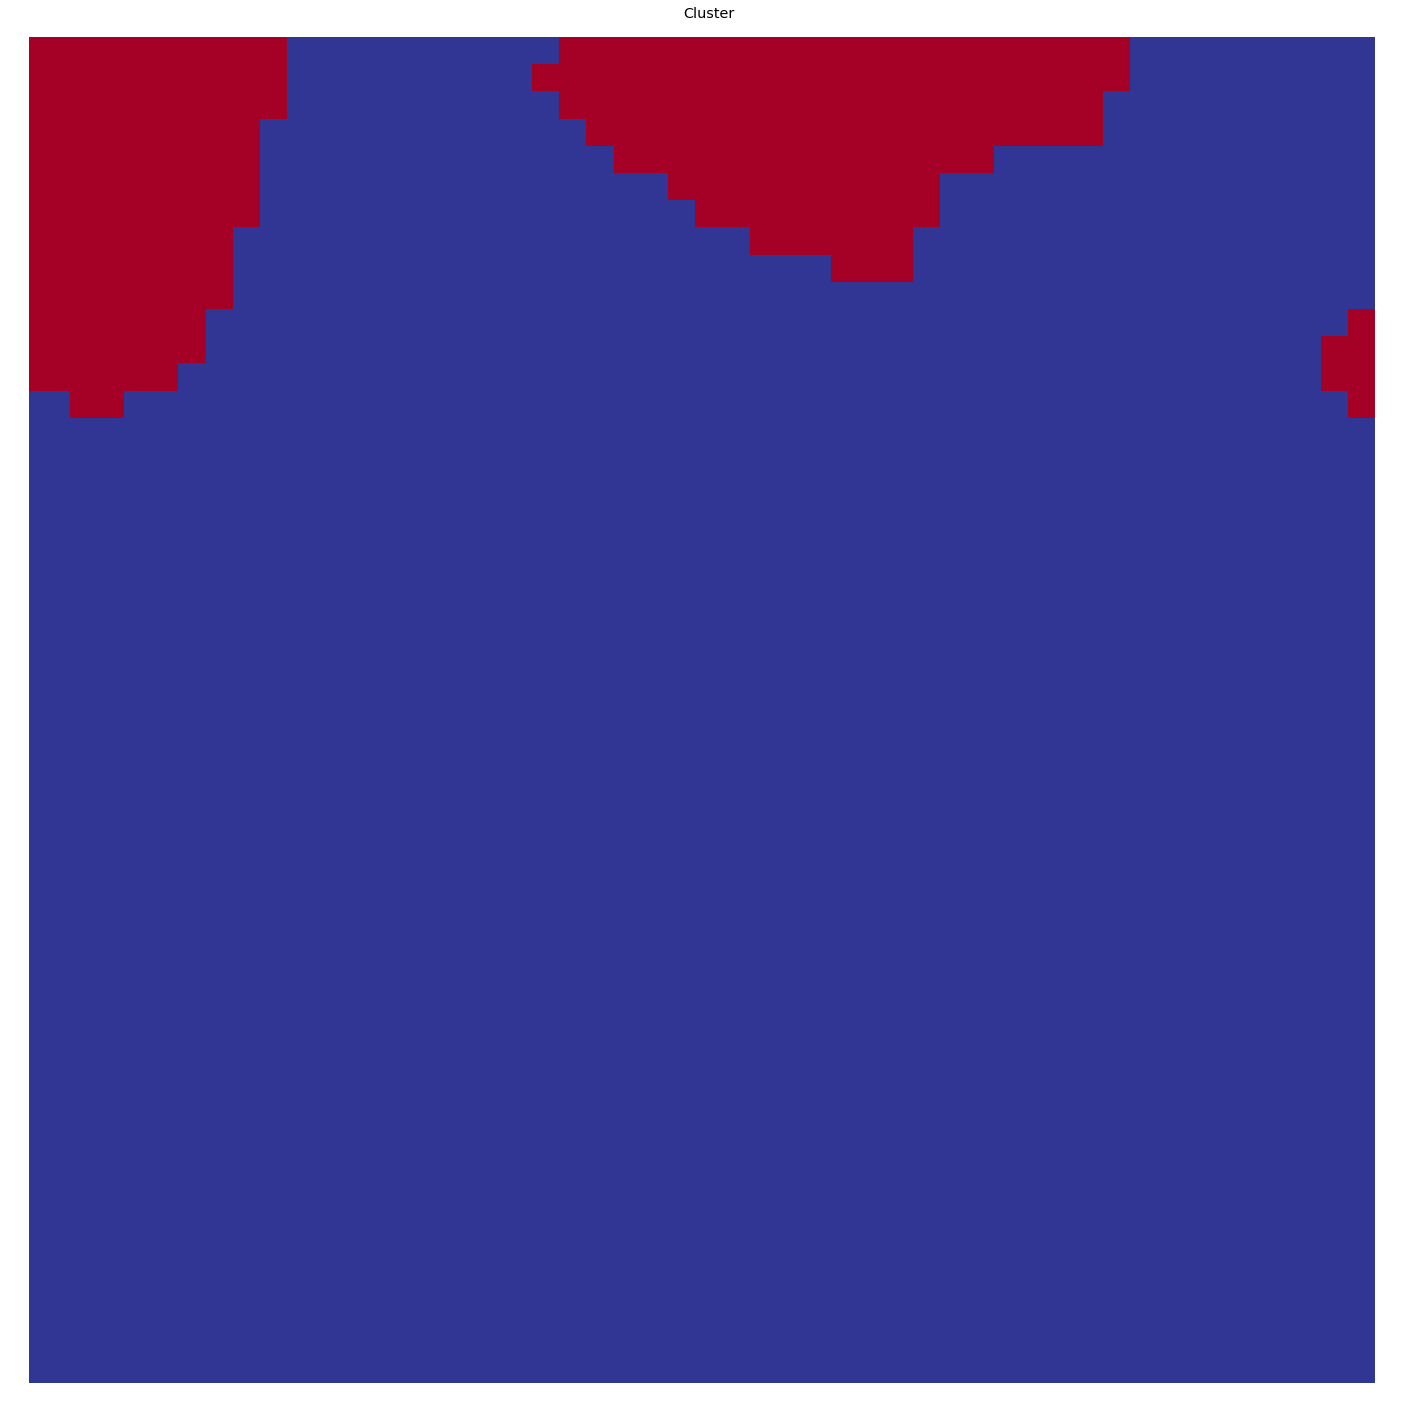

In [47]:
# Visualization Plots
vis  = sompy.mapview.View2DPacked(5, 5, 'Cluster',text_size=12)  
kmeans_labels = cluster(som, n_clusters=2)
som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_p

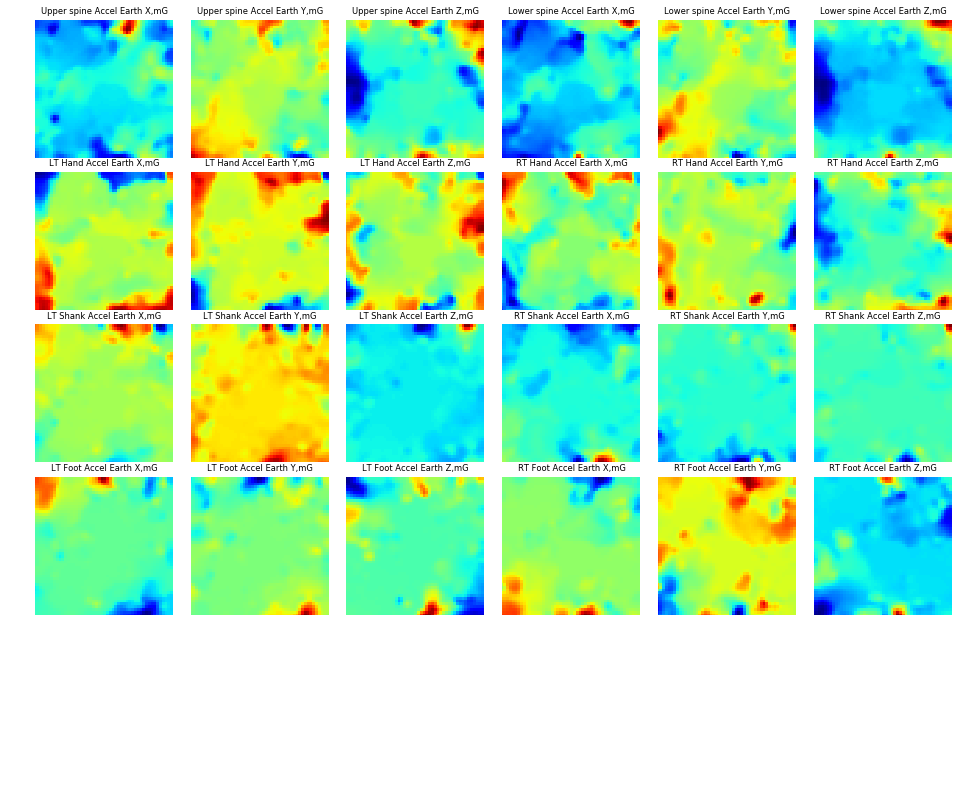

In [48]:
#Generate maps
som.component_names = columns_names
v  = sompy.mapview.View2DPacked(10, 10, '',text_size=7)
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


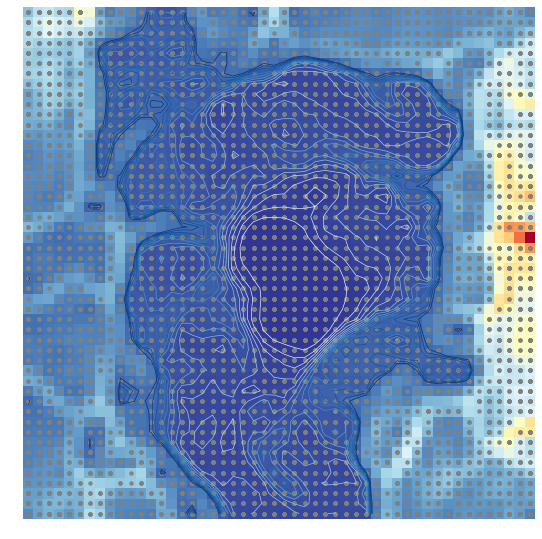

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f090ff74208>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f090ff74208>
Setting pcolormesh
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


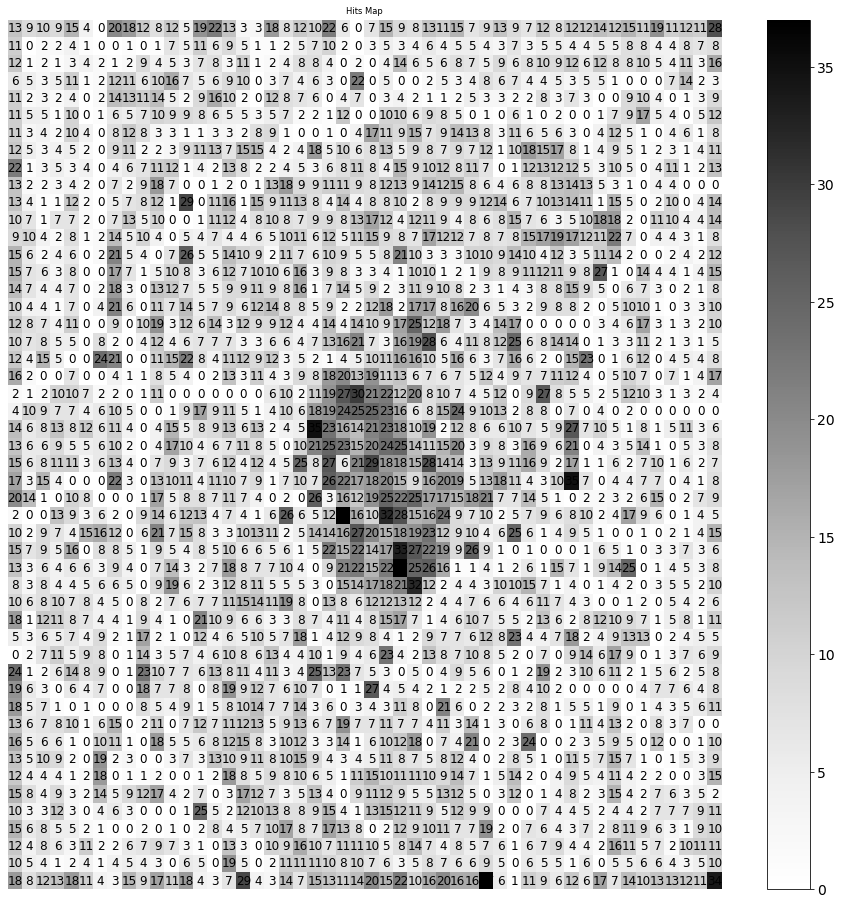

/home/mariana/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


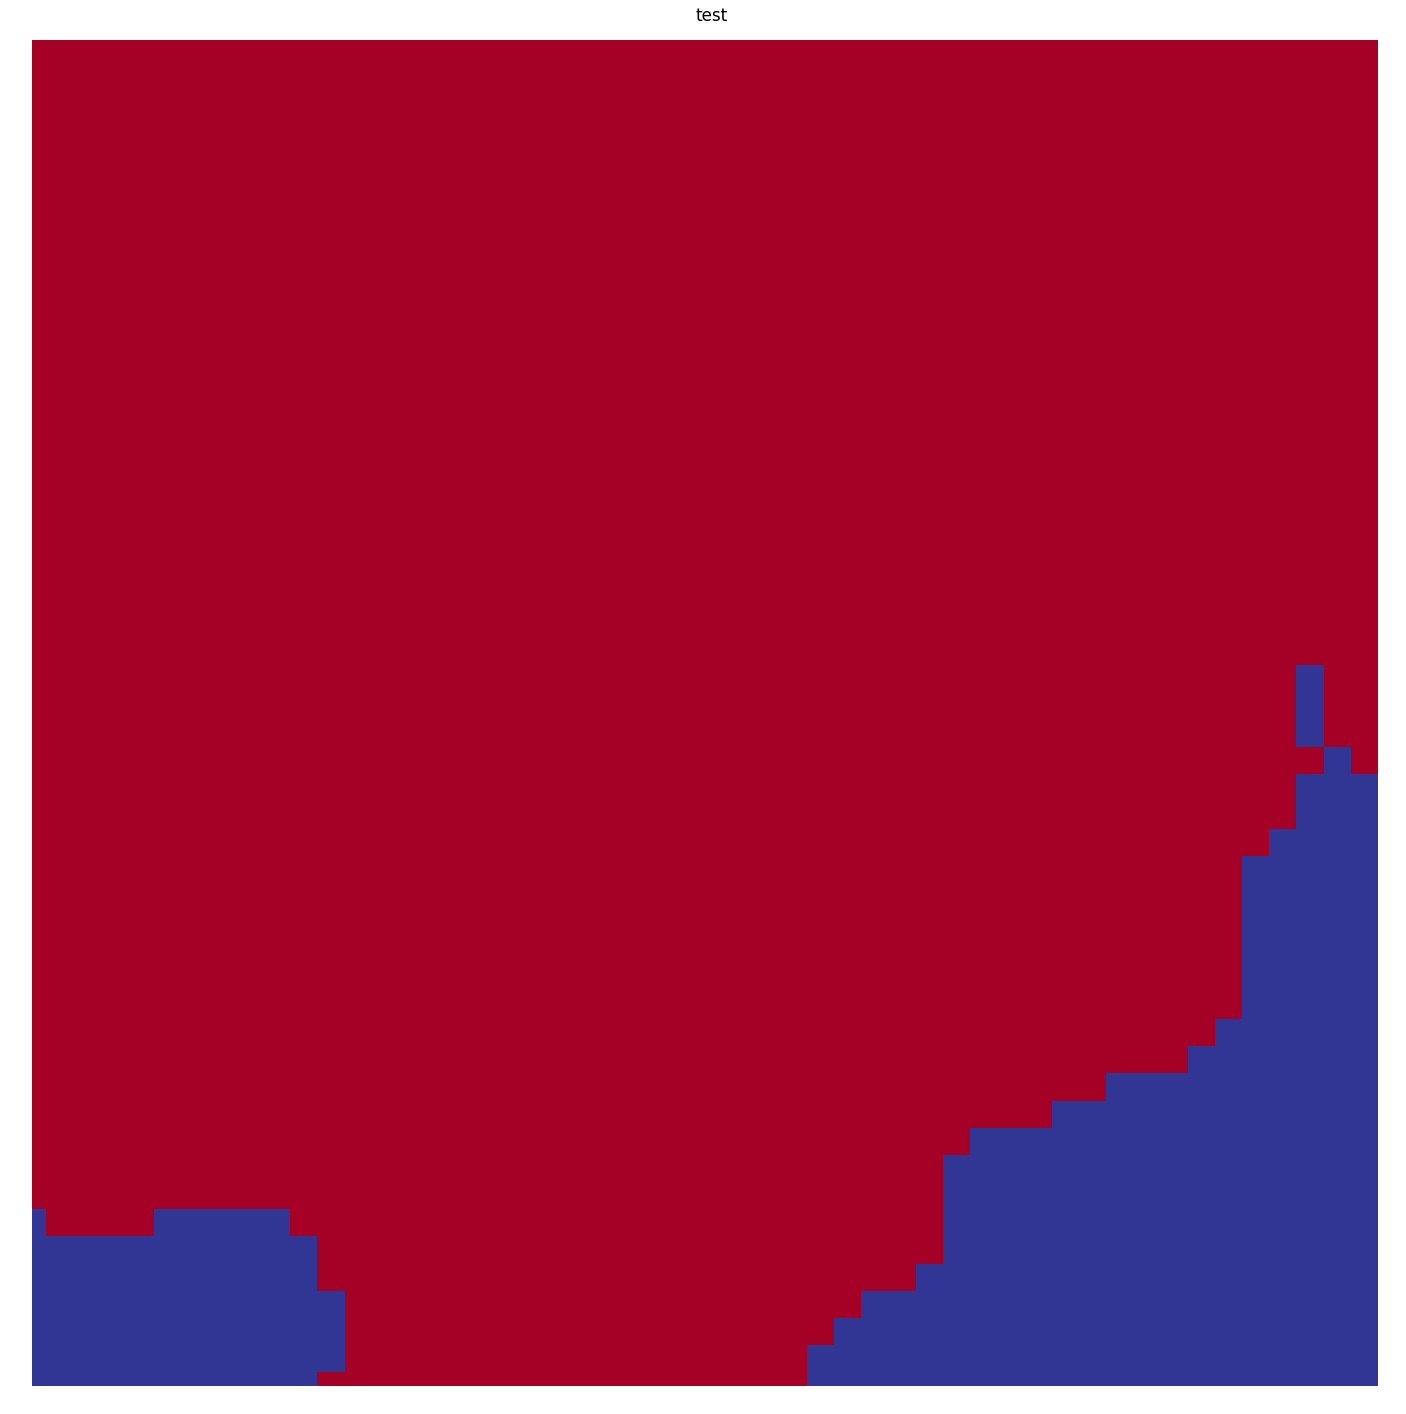

In [34]:
umat = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
umat.show(som)

from sompy.visualization.bmuhits import BmuHitsView
bmuhits  = BmuHitsView(50,50,"Hits Map",text_size=14)
bmuhits.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

v  = sompy.mapview.View2DPacked(10, 10, 'test',text_size=12)  
som.cluster(n_clusters=2)
v.show(som, what='cluster')